<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center><font color=#555555><font size=6> Ingeniería Financiera </font> <br> <br>

<center><font color=#555555><font size=5> ITE1731 - Microestructura y Sistemas de Trading </font> <br> <br> <br>

<center><font color=#555555><font size=5> I.F. Nombre Nombre Apellido Apellido </font> <br> <br>
   
<center> <font color= #555555> <font size = 4> Septiembre 2020 </a> | <font color= #555555> <font size = 4> Repositorio: <a href='https://github.com/'>Link</a></font>

<br>

---

<br>

<br>

<center> <font color= #555555> <font size = 7> Laboratorio 1 </font> <br> <br> <font color= #555555> <font size = 5> Inversión del Capital </font>

# <font color= #555555> <font size = 5> Abstract </font>

<font color= #6B6B6B> <font size = 2> Este documento fue elaborado por tu **nombre completo**, como un trabajo parcial para la materia de **Microestructura y Sistemas de Trading - ITE1731**, la cual es parte del curriculum de la licenciatura en Ingeniería Financiera, ofertada por la universidad **ITESO**. En el presente trabajo se plantea la respuesta a la siguiente pregutna: *¿Qué estrategia de inversión propondrías si tu trabajo fuera administrar 1 Millón de pesos?*</font>

<br>

# <font color= #6B6B6B> <font size = 6> 0. Librerías y Dependencias </font>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> <font size = 5> 0.1 Librerías </font> <font color= #555555>

Para correr este notebook es necesario tener instaladas y/o en el archivo _requirements.txt_ las siguientes librerías :

- pandas>=1.1.1 
- numpy>=1.19.1
- jupyter>=1.0.0
- yfinance>=0.1.54

# <font color= #6B6B6B> <font size = 5> 0.2 Dependencias </font> <font color= #555555>

Para correr este notebook es necesario contar con los siguientes archivos y dependencias externas:

- files/precios.csv : Precios históricos
- files/datos.txt : Otros datos históricos

<br>

# <font color= #6B6B6B> <font size = 6> 1. Introducción </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

# <font color= #6B6B6B> <font size = 6> 2. Objetivos </font>

<hr style="border:0.02in solid gray"> </hr>

<br>

# <font color= #6B6B6B> <font size = 6> 3. Datos </font>

<hr style="border:0.02in solid gray"> </hr>

In [1]:
# En esta sección es opcional incluir código para mostrar/visualizar
# los datos con los que se trabajó en el laboratorio

<br>

# <font color= #6B6B6B> <font size = 6> 4. Procesos </font>

<hr style="border:0.02in solid gray"> </hr>

In [1]:

import pandas as pd
import numpy as np
import functions as fn
from data import m6e1
from visualizations import vs

pd.set_option('display.max_rows', None)                   # sin limite de renglones maximos
pd.set_option('display.max_columns', None)                # sin limite de columnas maximas
pd.set_option('display.width', None)                      # sin limite el ancho del display
pd.set_option('display.expand_frame_repr', False)         # visualizar todas las columnas

# ------------------------------------------------------------------------------------------ Obtain data -- #

# m6e : Micro Eur/Usd Future: https://www.cmegroup.com/trading/fx/e-micros/e-micro-euro.html
# obtained with Quandl / Chris free data set. Gathers the data from webscraping cmegroup's future data
data = m6e1.tail(160)
# data.tail()

# -- ------------------------------------------------------------------------- Exploratory Data Analysis -- #

# Description table
# data.describe()

# OHLC plot
p_theme = {'color_1': '#ABABAB', 'color_2': '#ABABAB', 'color_3': '#ABABAB', 'font_color_1': '#ABABAB',
           'font_size_1': 12, 'font_size_2': 16}
p_dims = {'width': 1450, 'height': 800}
p_vlines = [data['timestamp'].head(1), data['timestamp'].tail(1)]
p_labels = {'title': 'Main title', 'x_title': 'x axis title', 'y_title': 'y axis title'}

# cargar funcion importada desde GIST de visualizaciones
ohlc = vs['g_ohlc'](p_ohlc=data, p_theme=p_theme, p_dims=p_dims, p_vlines=p_vlines, p_labels=p_labels)

# mostrar plot
# ohlc.show()

# -- ------------------------------------------------------------------------------- Feature Engineering -- #

# ingenieria de caracteristicas con variable endogena
features = fn.f_features(p_data=data, p_nmax=6)

# Conjunto de entrenamiento

# -- ---------------------------------------------------------------------------------- Feature analysis -- #

# matriz de correlacion
cor_mat = features.iloc[:, 1:].corr()

# -- ---------------------------------------------------------------------------------------- Models fit -- #

# Multple linear regression model
lm_model = fn.mult_regression(p_x=features.iloc[:, 3:], p_y=features.iloc[:, 1])
lm_model_reg = fn.mult_reg_l1l2(p_x=features.iloc[:, 3:], p_y=features.iloc[:, 1], p_alpha=1e-2, p_iter=1e6,
                                l1_ratio=.25)
# -- ------------------------------------------------------------------------------- Features simbolicos -- #

# semilla para siempre obtener el mismo resultado
np.random.seed(879)
# Generacion de muchos features formado con variables simbolica
symbolic, table = fn.symbolic_features(p_x=features.iloc[:, 3:], p_y=features.iloc[:, 1])
nuevos_features = pd.DataFrame(symbolic['fit'], index=features.index)

# -- ---------------------------------------------------------------------------------------- Models fit -- #

# Multple linear regression model
lm_model_s = fn.mult_regression(p_x=nuevos_features, p_y=features.iloc[:, 1])
lm_model_reg_s = fn.mult_reg_l1l2(p_x=nuevos_features, p_y=features.iloc[:, 1], p_alpha=.06, p_iter=1e6, l1_ratio=.5)
#


print('Modelo Lineal 1: rss: ', lm_model['rss'])
print('Modelo Lineal 1: score: ', lm_model['score'])
# RSS of the model with all the variables
print('Modelo Lineal simbolico y con regularización: rss: ', lm_model_reg_s['elasticnet']['rss'])
print('Modelo Lineal simbolico y con regularización: score: ', lm_model_reg_s['elasticnet']['score'])

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   169.16         0.103456        3         0.657533              N/A      3.07m
Modelo Lineal 1: rss:  42194.8708
Modelo Lineal 1: score:  0.47118236562830484
Modelo Lineal simbolico y con regularización: rss:  29050.15834075206
Modelo Lineal simbolico y con regularización: score:  0.6359217194268421


In [14]:
import pandas.plotting as cor
simbolic=nuevos_features.iloc[:, -10:]
p_y=features.iloc[:, 1]
nuevo=pd.concat([simbolic,p_y],axis=1)

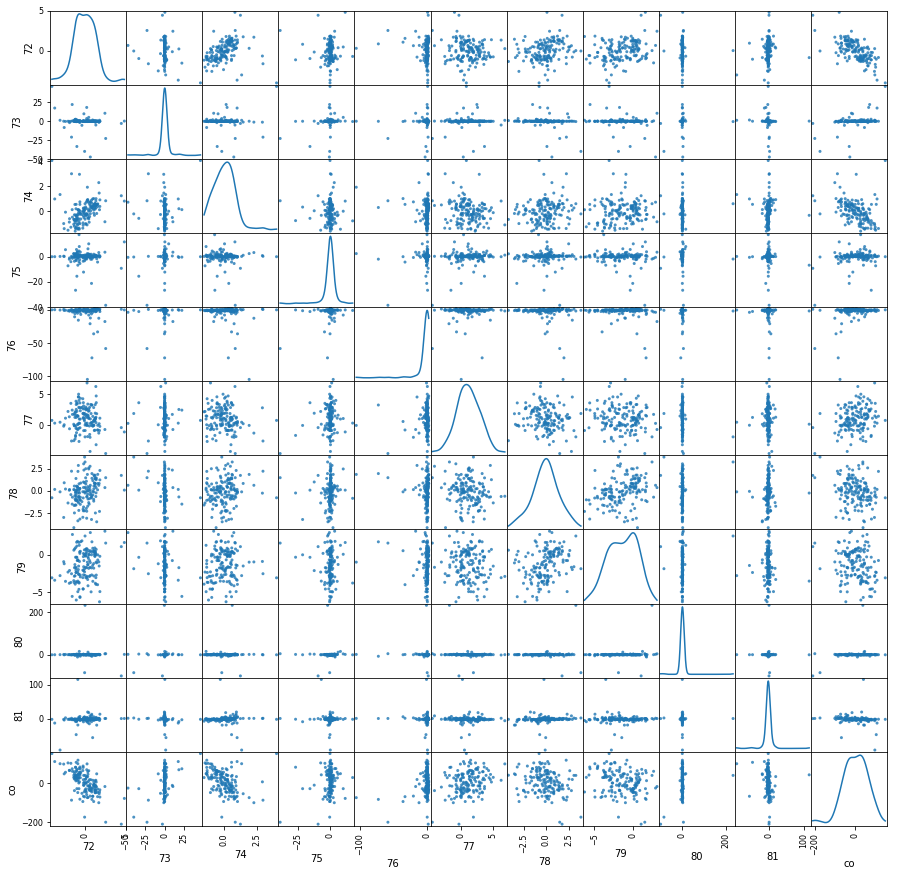

In [16]:
cor.scatter_matrix(nuevo, diagonal='kde', alpha=0.8, figsize=(15,15));

# <font color= #6B6B6B> <font size = 6> 5. Conclusiones </font>

<hr style="border:0.02in solid gray"> </hr>

In [3]:
# en esta seccion es opcional incluir algun codigo para mostrar
# visualmente algun concepto o hallazgo relevante como conclusion